<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/DL-Pytorch/visualizing-result-confusion-matrix/CNN_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import itertools


In [77]:
train_set = torchvision.datasets.FashionMNIST(
    root='./root',
    train = True,
    download=True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

In [78]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

  def forward(self,t):
    t = F.relu(self.conv1(t))
    t = F.max_pool2d(t, kernel_size=2, stride=2)
        
    t = F.relu(self.conv2(t))
    t = F.max_pool2d(t, kernel_size=2, stride=2)
        
    t = F.relu(self.fc1(t.reshape(-1, 12*4*4)))
    t = F.relu(self.fc2(t))
    t = self.out(t)

    return t

In [79]:
def get_num_correct(preds, labels):
  return preds.argmax(dim = 1).eq(labels).sum().item()

In [80]:
network = Network()

In [81]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr = 0.01)

In [82]:
for epoch in range(10):
  total_loss = 0
  total_correct = 0 
  count = 0
  for batch in train_loader:
    count += 1
    images, labels = batch

    preds = network(images)
    loss = F.cross_entropy(preds, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    total_correct += get_num_correct(preds,labels)

  print(
    "count", count,
    "epoch", epoch,
    "total_correct", total_correct,
    "loss", total_loss
  )


count 600 epoch 0 total_correct 46948 loss 346.4995184838772
count 600 epoch 1 total_correct 51506 loss 231.9491099268198
count 600 epoch 2 total_correct 52341 loss 209.40936601161957
count 600 epoch 3 total_correct 52575 loss 200.455738812685
count 600 epoch 4 total_correct 52861 loss 192.8133318349719
count 600 epoch 5 total_correct 52984 loss 190.57203456014395
count 600 epoch 6 total_correct 53123 loss 186.5576617643237
count 600 epoch 7 total_correct 53291 loss 183.6342300400138
count 600 epoch 8 total_correct 53235 loss 183.528907969594
count 600 epoch 9 total_correct 53405 loss 180.29351399838924


In [83]:
def get_all_preds(model,loader):
  all_preds = torch.tensor([])
  for batch in loader:
    images, labels = batch

    preds = model(images)
    all_preds = torch.cat((all_preds, preds), dim = 0)
  return all_preds

In [84]:
with torch.no_grad():
  prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
  train_preds = get_all_preds(network, prediction_loader)

In [85]:
train_preds.shape

torch.Size([60000, 10])

In [86]:
print(len(train_set.targets))
print(len(train_set))

60000
60000


In [87]:
preds_correct = get_num_correct(train_preds, train_set.targets)
print(f'Total correct:', preds_correct)
print(f'Accuracy:', preds_correct / len(train_set))

Total correct: 53413
Accuracy: 0.8902166666666667


In [88]:
train_set.targets.shape

torch.Size([60000])

In [89]:
train_preds.argmax(dim=1)

tensor([9, 0, 0,  ..., 3, 0, 5])

In [90]:
stacked = torch.stack(
    (
        train_set.targets,
        train_preds.argmax(dim = 1)
    ),
    dim = 1
)
stacked.shape

torch.Size([60000, 2])

In [91]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [92]:
stacked[0].tolist()

[9, 9]

In [93]:
cmt = torch.zeros(10,10, dtype = torch.int64)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [94]:
tl, pl = stacked[0]
print(f'tl:{tl}')
print(f'pl:{pl}')
cmt[0,0]

tl:9
pl:9


tensor(0)

In [95]:
for p in stacked:
  tl, pl = p.tolist()
  cmt[tl,pl] = cmt[tl,pl] + 1
cmt

tensor([[5467,   14,   46,  110,    7,    0,  283,    5,   68,    0],
        [   6, 5919,    3,   53,    6,    1,    6,    0,    6,    0],
        [  94,    7, 4797,   58,  456,    9,  454,    3,  121,    1],
        [ 140,  154,   13, 5423,  143,    4,   74,    0,   49,    0],
        [   8,   10,  405,  227, 4703,    0,  543,    1,  100,    3],
        [   0,    0,    0,    3,    0, 5796,    0,  122,   31,   48],
        [1073,    8,  446,  136,  292,    0, 3818,    2,  224,    1],
        [   0,    0,    0,    0,    0,   48,    0, 5872,    1,   79],
        [  10,    2,    7,   12,    4,    9,   12,    5, 5938,    1],
        [   0,    0,    1,    4,    0,   19,    0,  295,    1, 5680]])

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
print(type(cm))
print(cm)

<class 'numpy.ndarray'>
[[5467   14   46  110    7    0  283    5   68    0]
 [   6 5919    3   53    6    1    6    0    6    0]
 [  94    7 4797   58  456    9  454    3  121    1]
 [ 140  154   13 5423  143    4   74    0   49    0]
 [   8   10  405  227 4703    0  543    1  100    3]
 [   0    0    0    3    0 5796    0  122   31   48]
 [1073    8  446  136  292    0 3818    2  224    1]
 [   0    0    0    0    0   48    0 5872    1   79]
 [  10    2    7   12    4    9   12    5 5938    1]
 [   0    0    1    4    0   19    0  295    1 5680]]


In [98]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else: 
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5467   14   46  110    7    0  283    5   68    0]
 [   6 5919    3   53    6    1    6    0    6    0]
 [  94    7 4797   58  456    9  454    3  121    1]
 [ 140  154   13 5423  143    4   74    0   49    0]
 [   8   10  405  227 4703    0  543    1  100    3]
 [   0    0    0    3    0 5796    0  122   31   48]
 [1073    8  446  136  292    0 3818    2  224    1]
 [   0    0    0    0    0   48    0 5872    1   79]
 [  10    2    7   12    4    9   12    5 5938    1]
 [   0    0    1    4    0   19    0  295    1 5680]]


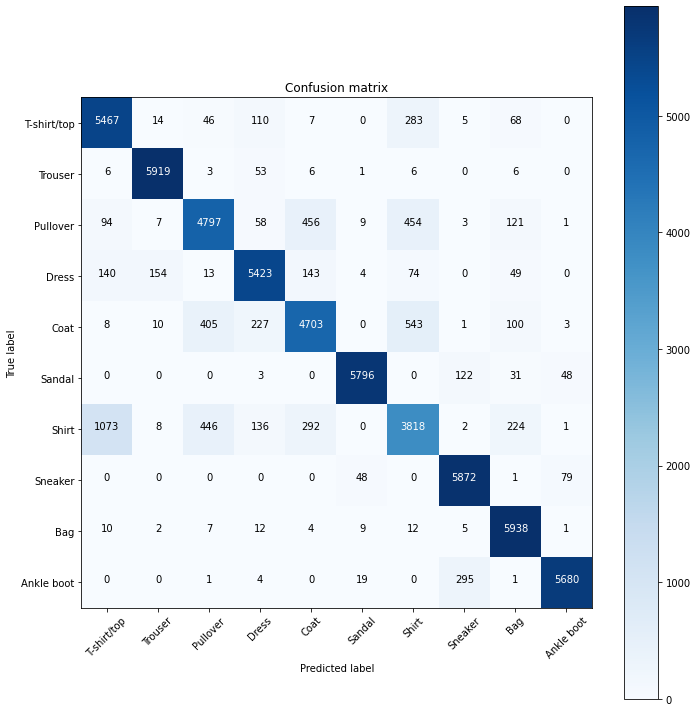

In [99]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm,train_set.classes)